In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
from datetime import timedelta
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [73]:
class Person:
    def __init__(self, ID, name, last_name, birthday, credit,AAPL,AMZN,FB,GOOGL,TSLA):
        self.name=name
        self.last_name=last_name
        self.ID=ID
        self.birthday=birthday
        self.credit=float(credit)
        self.pAssets={'AAPL':AAPL,'AMZN':AMZN,'FB':FB,'GOOGL':GOOGL,'TSLA':TSLA}

In [74]:
market=pd.read_csv("stock_market_data.csv")
market=market.sort_values(by=['Date', 'Symbol'])
market=market.reset_index()
market['index']=market.index
market.head()


,index,Date,Symbol,Open,Volume
0,0,2009-12-31,AAPL,7.622500,493729600.0
1,1,2009-12-31,AMZN,136.250000,7599900.0
2,2,2009-12-31,FB,42.049999,573576400.0
3,3,2009-12-31,GOOGL,313.788788,3908488.0
4,4,2009-12-31,TSLA,3.800000,93831500.0


In [75]:
#x=float(market.iloc[market.loc[market['Date']=='2009-12-31'][market['Symbol']=='AAPL'].index]['Open'].values)

In [76]:
print("Enter date:")
y,m,d = input().split('/')
dd = datetime.datetime(int(y), int(m), int(d))
print(dd)

Enter date:
2020-06-05 00:00:00


In [77]:
f = open("Accounts.txt", "a")
f.close()
f = open("temp_Accounts.txt", "a")
f.close()

In [78]:
def Check_ID(ID):
    f = open("Accounts.txt")
    while True:
        s=f.readline()
        l=s.split(',')
        if l[0]==ID:
            f.close()
            return l
        elif s=="":
            f.close()
            return False
def Register(ID, name, last_name, birthday, credit):
    f = open("Accounts.txt", "a")
    f.write('\n'+ID+','+name+','+last_name+','+birthday+','+credit+','+ '0'+','+'0'+','+'0'+','+'0'+','+'0')
    f.close()
def Assets():
    print(p.pAssets)
def Buy():
    order=input('Which stock?')
    x=float(market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']==order].index]['Open'].values)
    if p.credit>= x:
        p.pAssets[order] =p.pAssets[order]+1
        p.credit=p.credit-x
        print('you successfully buy 1 stock of '+ str(order)+'\nyour current credit is '+str(p.credit))
    else:
        print('You do not have enough credit')
def Sell():
    Assets()
    order=input('Which stock? ')
    x=float(market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']==order].index]['Open'].values)
    p.pAssets[order] =p.pAssets[order]-1
    p.credit=p.credit+x
    print('you successfully sold 1 stock of '+ str(order)+'\nyour current credit is '+str(p.credit))
def Rewrite_credit(ID):
    f = open("Accounts.txt", "r")
    w = open("temp_Accounts.txt", "w")
    while True:
        s=f.readline()
        l=s.split(',')
        if l[0]==ID:
            w.write('\n'+p.ID+','+p.name+','+p.last_name+','+p.birthday+','+str(p.credit)+','+ str(p.pAssets['AAPL'])+','+str(p.pAssets['AMZN'])+','+str(p.pAssets['FB'])+','+str(p.pAssets['GOOGL'])+','+str(p.pAssets['TSLA']))
        elif s=='':
            break
        else:
            w.write('\n'+s)
    f.close()
    w.close()
    w = open("Accounts.txt", "w")
    f = open("temp_Accounts.txt", "r")
    w.write(f.read())
    w.close()
    f.close()
def chart():
    market['Date'] = pd.to_datetime(market['Date'])
    x=market.loc[market['Date']==dd][market['Symbol']=='AAPL']['index'].values
    market.head(x[0])
    grouped_data = market.head(x[0]).groupby('Symbol')
    
    for symbol, group in grouped_data:
        plt.plot(group['Date'], group['Open'], label=symbol)

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Changes Over Time (Separate Charts for Symbols)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
def reg():
    market['Date'] = pd.to_datetime(market['Date'])
    x=market.loc[market['Date']==dd][market['Symbol']=='AAPL']['index'].values
    market.head(x[0])
    grouped_data = market.head(x[0]).groupby('Symbol')
    for symbol, group in grouped_data:
        plt.figure()  

        group['Date_Num'] = mdates.date2num(group['Date'])
        plt.plot(group['Date_Num'], group['Open'], label='Stock Price')
        sns.regplot(data=group, x='Date_Num', y='Open', scatter=False, color='red', label='Regression Line')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.title('Stock Price Changes Over Time for Symbol: ' + symbol)
        plt.xticks(rotation=45)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.legend()
        plt.tight_layout()
        plt.show()

        

In [79]:
print("1. sign in\n2. sign up")
order=input()
if order=='1':
    print("Enter your ID:", end=" ")
    ID=input()
    b=Check_ID(ID)
    if b:
        p=Person(b[0],b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8],b[9])
    else:
        print("ID not found.\n")
        order='2'
if order=='2':
    print("Enter your ID, name, last name, birthday, and credit seprated with comma\n")
    ID, name, last_name, birthday, credit= input().split(",")
    Register(ID, name, last_name, birthday, credit) 
    p=Person(ID, name, last_name, birthday, credit,0,0,0,0,0)

1. sign in
2. sign up
Enter your ID, name, last name, birthday, and credit seprated with comma



Your account balance is: 2000.0
Market of 2020-06-05 00:00:00:


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\224398247.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mar['Changes(%)']=ar


,index,Date,Symbol,Open,Volume,Changes(%)
13145,13145,2020-06-05,AAPL,80.837502,137250400.0,100.0
13146,13146,2020-06-05,AMZN,2444.510010,3306400.0,100.0
13147,13147,2020-06-05,FB,226.710007,16750400.0,100.0
13148,13148,2020-06-05,GOOGL,1415.640015,2132100.0,100.0
13149,13149,2020-06-05,TSLA,175.567993,39059500.0,100.0


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\2648003968.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=market.loc[market['Date']==dd][market['Symbol']=='AAPL']['index'].values


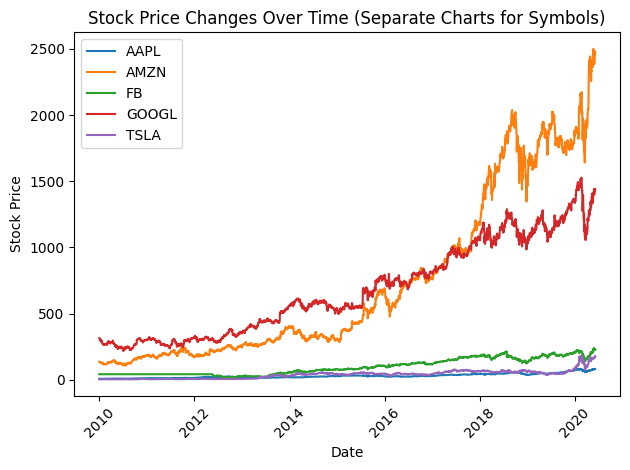

Market of 2020-06-05 00:00:00:


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\224398247.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mar['Changes(%)']=ar


,index,Date,Symbol,Open,Volume,Changes(%)
13145,13145,2020-06-05,AAPL,80.837502,137250400.0,1.237050
13146,13146,2020-06-05,AMZN,2444.510010,3306400.0,0.040908
13147,13147,2020-06-05,FB,226.710007,16750400.0,0.441092
13148,13148,2020-06-05,GOOGL,1415.640015,2132100.0,0.070639
13149,13149,2020-06-05,TSLA,175.567993,39059500.0,0.569580


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\2648003968.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=float(market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']==order].index]['Open'].values)


you successfully buy 1 stock of FB
your current credit is 1773.2899932861328


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\2648003968.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=float(market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']==order].index]['Open'].values)


you successfully buy 1 stock of AAPL
your current credit is 1692.452491760254


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\224398247.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AAPL'].index]['Open'].values[0]
C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\224398247.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('The value of your Assets is: '+str(int(p.pAssets['AAPL'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AAPL'].index]['Open'].values[0]+int(p.pAssets['AMZN'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AMZN'].index]['Open'].values[0]+int(p.pAssets['FB'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='FB'].index]['Open'].values[0]+int(p.pAssets['GOOGL'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='GOOGL'].index]['Open'].values[0]+i

The value of your Assets is: 307.5475082397461
{'AAPL': 1, 'AMZN': 0, 'FB': 1, 'GOOGL': 0, 'TSLA': 0}


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\2648003968.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=market.loc[market['Date']==dd][market['Symbol']=='AAPL']['index'].values


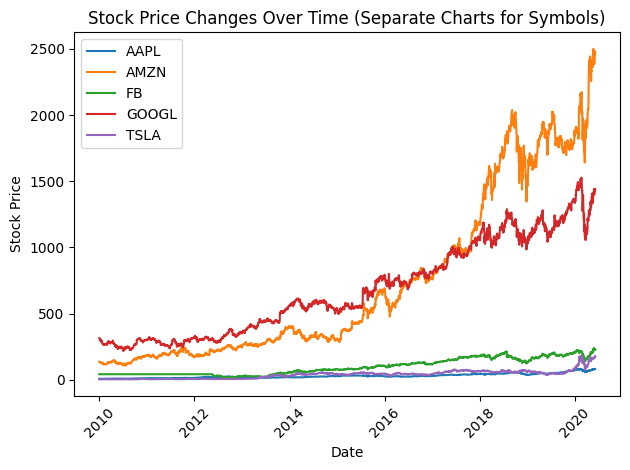

C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\2648003968.py:71: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=market.loc[market['Date']==dd][market['Symbol']=='AAPL']['index'].values


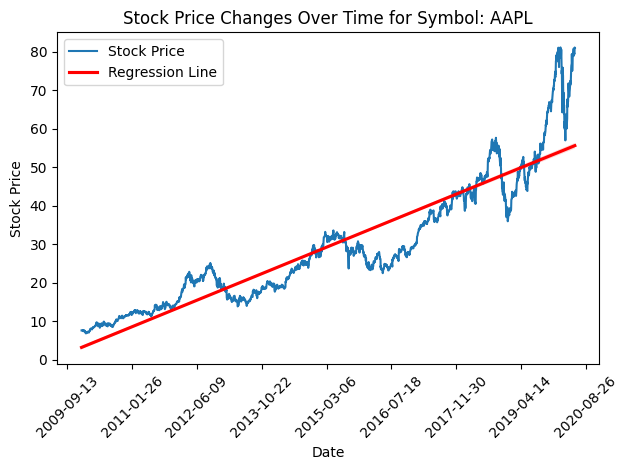

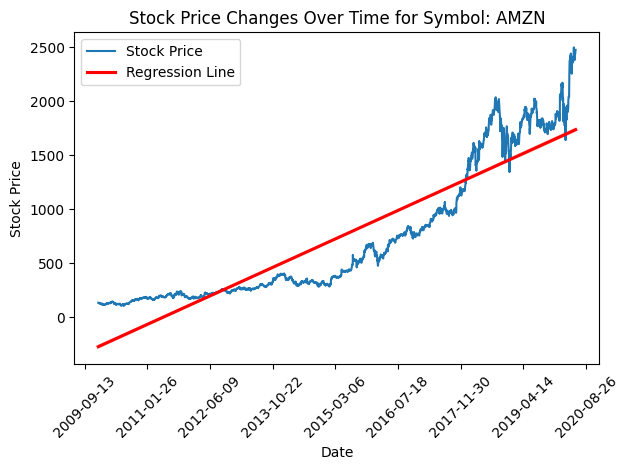

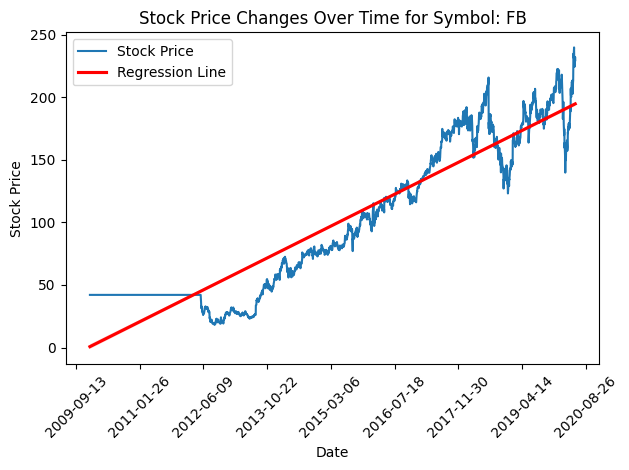

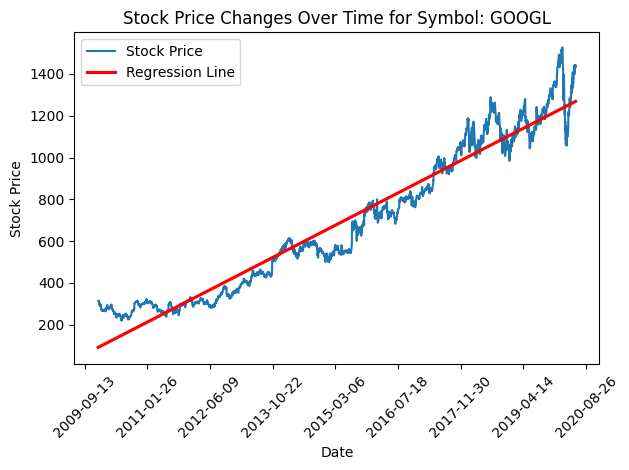

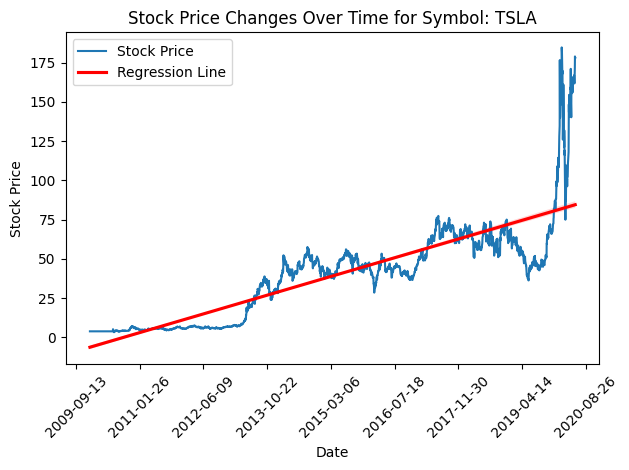

Market of 2020-06-05 00:00:00:


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\224398247.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mar['Changes(%)']=ar


,index,Date,Symbol,Open,Volume,Changes(%)
13145,13145,2020-06-05,AAPL,80.837502,137250400.0,0.015303
13146,13146,2020-06-05,AMZN,2444.510010,3306400.0,0.000017
13147,13147,2020-06-05,FB,226.710007,16750400.0,0.001946
13148,13148,2020-06-05,GOOGL,1415.640015,2132100.0,0.000050
13149,13149,2020-06-05,TSLA,175.567993,39059500.0,0.003244


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\224398247.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AAPL'].index]['Open'].values[0]
C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\224398247.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('The value of your Assets is: '+str(int(p.pAssets['AAPL'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AAPL'].index]['Open'].values[0]+int(p.pAssets['AMZN'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AMZN'].index]['Open'].values[0]+int(p.pAssets['FB'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='FB'].index]['Open'].values[0]+int(p.pAssets['GOOGL'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='GOOGL'].index]['Open'].values[0]+i

The value of your Assets is: 307.5475082397461
{'AAPL': 1, 'AMZN': 0, 'FB': 1, 'GOOGL': 0, 'TSLA': 0}
{'AAPL': 1, 'AMZN': 0, 'FB': 1, 'GOOGL': 0, 'TSLA': 0}


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\2648003968.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=float(market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']==order].index]['Open'].values)


you successfully sold 1 stock of AAPL
your current credit is 1773.2899932861328


C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\224398247.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AAPL'].index]['Open'].values[0]
C:\Users\Sajad\AppData\Local\Temp\ipykernel_19076\224398247.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('The value of your Assets is: '+str(int(p.pAssets['AAPL'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AAPL'].index]['Open'].values[0]+int(p.pAssets['AMZN'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AMZN'].index]['Open'].values[0]+int(p.pAssets['FB'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='FB'].index]['Open'].values[0]+int(p.pAssets['GOOGL'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='GOOGL'].index]['Open'].values[0]+i

The value of your Assets is: 226.7100067138672
{'AAPL': 0, 'AMZN': 0, 'FB': 1, 'GOOGL': 0, 'TSLA': 0}
Thank you for choosing us. Good luck.


In [80]:
print('Your account balance is:',p.credit)
ar=100*market.loc[market['Date']==dd.strftime("%Y-%m-%d")]['Open'].values
while True:
    order=input("1.Market   2.Assets   3.Buy   4.Sell   5.Next day  6.Chart  7.Charts with regression   8.Exit")
    if order=='1':
        mar=market.loc[market['Date']==dd.strftime("%Y-%m-%d")]
        #ar=100*market.iloc[market.loc[market['Date']==dd-timedelta(days=1)].index]['Open'].values/market.iloc[market.loc[market['Date']==dd].index]['Open'].values
        ar=ar/market.loc[market['Date']==dd.strftime("%Y-%m-%d")]['Open'].values
        mar['Changes(%)']=ar
        print('Market of '+str(dd)+':')
        mar
    elif order=='2':
        a=market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AAPL'].index]['Open'].values[0]
        print('The value of your Assets is: '+str(int(p.pAssets['AAPL'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AAPL'].index]['Open'].values[0]+int(p.pAssets['AMZN'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='AMZN'].index]['Open'].values[0]+int(p.pAssets['FB'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='FB'].index]['Open'].values[0]+int(p.pAssets['GOOGL'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='GOOGL'].index]['Open'].values[0]+int(p.pAssets['TSLA'])*market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']=='TSLA'].index]['Open'].values[0]))
        Assets()
    elif order=='3':
        Buy()
    elif order=='4':
        Sell()
    elif order=='5':
        ar=100*market.loc[market['Date']==dd.strftime("%Y-%m-%d")]['Open'].values
        dd=dd+ timedelta(days=1)
        while str(market.loc[market['Date']==dd.strftime("%Y-%m-%d")]['Open'].values.shape)=='(0,)':
            dd=dd+ timedelta(days=1)
        print(dd)
    elif order=='6':
        chart()
    elif order=='7':
        reg()
    elif order=='8':
        print("Thank you for choosing us. Good luck.")
        Rewrite_credit(p.ID)
        break